# Decision Trees

In [1]:
import pandas as pd

df = pd.read_csv('../data/airline_satisfaction.csv')
df = df.sample(n=10000, random_state=12345)
print(df.shape)
df.head()

(10000, 23)


,satisfaction,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Seat comfort,Departure/Arrival time convenient,Food and drink,...,Online support,Ease of Online booking,On-board service,Leg room service,Baggage handling,Checkin service,Cleanliness,Online boarding,Departure Delay in Minutes,Arrival Delay in Minutes
129218,satisfied,Male,Loyal Customer,37,Business travel,Eco,1708,5,4,2,...,5,5,3,1,4,5,1,5,0,0.0
23699,satisfied,Female,Loyal Customer,41,Personal Travel,Eco,2027,2,2,2,...,5,5,2,3,5,1,4,5,75,81.0
56036,dissatisfied,Female,disloyal Customer,56,Business travel,Eco,1247,3,4,3,...,5,5,5,2,2,1,3,5,0,0.0
103746,satisfied,Male,Loyal Customer,35,Business travel,Business,3162,3,3,5,...,5,4,4,4,4,5,4,4,0,0.0
78969,dissatisfied,Male,Loyal Customer,60,Business travel,Business,3151,2,1,1,...,3,2,2,3,2,1,2,4,81,93.0


## Data Understanding (EDA)

### Univariate Properties

In [ ]:
import sys
sys.path.append("C:\\Users\\tyler\\OneDrive - Brigham Young University\\Documents\\IS 455\\class-code-notebook")

from functions import functions as fun

fun.univariate(df)

### Bivariate Analysis

In [ ]:
fun.bivariate(df, label='satisfaction')

### Data Preparation

In [4]:
df.dropna(inplace=True)
df.shape

(9968, 23)

### Modeling

In [1]:
from sklearn.tree import DecisionTreeClassifier


y = df.satisfaction
X = pd.get_dummies(
    df.drop(columns=["satisfaction", "Customer Type"]),
    drop_first=True,
    dtype="int64",
)

model = DecisionTreeClassifier(max_depth=6)

model.fit(X, y)
X.head()

NameError: name 'df' is not defined

In [ ]:
df['Predicted'] = model.predict(X)
df[['satisfaction', 'Predicted']].head(10)

,satisfaction,Predicted
129218,satisfied,satisfied
23699,satisfied,satisfied
56036,dissatisfied,dissatisfied
103746,satisfied,satisfied
78969,dissatisfied,dissatisfied
17814,dissatisfied,dissatisfied
36329,dissatisfied,dissatisfied
65835,dissatisfied,dissatisfied
37516,dissatisfied,dissatisfied
62981,satisfied,satisfied


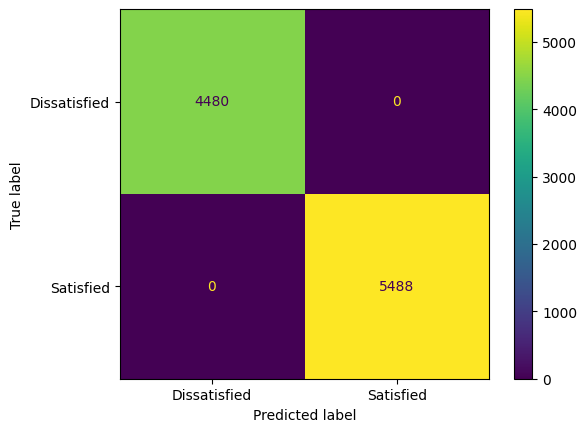

In [ ]:
from sklearn import metrics
import matplotlib.pyplot as plt 

cm = metrics.confusion_matrix(y, df['Predicted'])
cm_display = metrics.ConfusionMatrixDisplay(cm, display_labels=['Dissatisfied', 'Satisfied'])
cm_display.plot(values_format='d')
plt.show()


In [ ]:
from sklearn.tree import export_graphviz
from six import StringIO
from IPython.display import Image
import pydotplus

dot_data = StringIO()

export_graphviz(model,
                out_file=dot_data,
                filled=True,
                rounded=True,
                feature_names= X.columns,
                class_names=['dissatisfied', 'satisfied'])

graph = pydotplus.graph_from_dot_data(dot_data.getvalue())

graph.write_png('satisfactino.png')
Image(graph.create_png)


InvocationException: GraphViz's executables not found